# This note book file concentrates on classifiers like Desicion Tree and Naive Bayes algorithms perfomed on Cardio vascular disease dataset.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Required Libraries

In [1]:
#Required imports are listed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn import tree


## Dataset details
1) cardio_train.csv  

### Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


## Load Dataset

In [4]:
df_data=pd.read_csv('/content/drive/MyDrive/datasets/cardio_train.csv',sep=';') # loading dataset

## Preprocessing

In [5]:
# details of dataset
print (">>Details of df_data data frame are: \n", )
df_data.info()

#Checking Null values
null_columns=df_data.columns[df_data.isnull().any()]
print("\n>>Following shows column and number of null entries in the column\n",df_data[null_columns].isnull().sum())

>>Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

>>Following shows column and number of null entries in the column
 Series([], dtype: float64)


## 2) First and last five records of your dataset

In [6]:
df_data.head() #first 5 data

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [7]:
df_data.tail() #last 5 data

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0

## 3) class labels

In [8]:
df_data.columns #column labels

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## 4) Split dataset 75% for training, 25% for testing the classifier

In [9]:
#X = df_data.iloc[:,1:-1]
X = df_data.loc[:,df_data.columns != 'cardio']   #Getting all the data except id and cardio columns
Y = df_data.loc[:,'cardio']  #cardio is target variable.

# Training and testing the dataset by splitting
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.25)

print('Training DataSet size' )
print(X_train.shape) # 75% split dataset detail (entries and columns)
print('Testing DataSet size' )
print(X_test.shape)  # 25% split dataset detail (entries and columns)


Training DataSet size
(52500, 12)
Testing DataSet size
(17500, 12)


# DecisionTree


## 1) Gini to measure the quality of a split

In [10]:
# max_depth_range 4,5,6
max_depth_range = list(range(4, 7))

# List to store the accuracy for each max_depth
accuracy = []

#Printing accuracy scores for different depths.
for depth in max_depth_range:
    gini = DecisionTreeClassifier(max_depth = depth)
    gini.fit(X_train, Y_train)
    Y_predict_gini = gini.predict(X_test)
    print("Accuracy score of Gini for depth ",depth,"=",accuracy_score(Y_test,Y_predict_gini))  # printing accuracy score

Accuracy score of Gini for depth  4 = 0.7350285714285715
Accuracy score of Gini for depth  5 = 0.7366285714285714
Accuracy score of Gini for depth  6 = 0.7363428571428572


## 2) Entropy to measure the quality of a split

In [11]:
# max_depth_range 4,5,6
max_depth_range = list(range(4, 7))

# List to store the accuracy for each max_depth
accuracy = []

#Printing accuracy scores for different depths.
for depth in max_depth_range:
    entropy = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion = "entropy")
    entropy.fit(X_train, Y_train)
    Y_predict_entropy= entropy.predict(X_test)
    print("Accuracy score of Entropy for depth ",depth,"=",accuracy_score(Y_test,Y_predict_entropy)) # printing accuracy score


Accuracy score of Entropy for depth  4 = 0.7353142857142857
Accuracy score of Entropy for depth  5 = 0.7369714285714286
Accuracy score of Entropy for depth  6 = 0.7362857142857143


## 3) Confusion matrix

## Gini

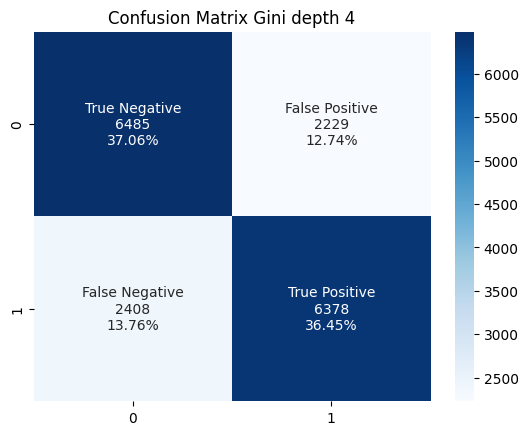

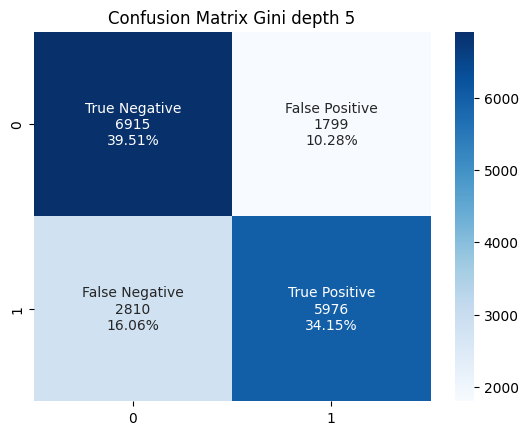

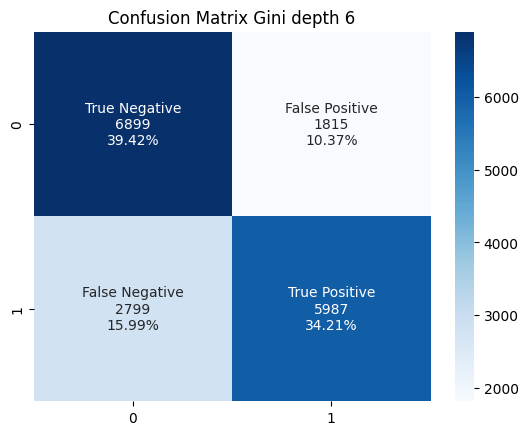

In [12]:
# max_depth_range 4,5,6
max_depth_range = list(range(4, 7))
cf_matrix = []

#Calculating confusion matric for different depths.
for depth in max_depth_range:
    gini = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='gini')
    gini.fit(X_train, Y_train)
    Y_predict_gini = gini.predict(X_test)
    cf_matrix = confusion_matrix(Y_test,Y_predict_gini)

    group_labels = ["True Negative","False Positive","False Negative","True Positive"]

    group_counts = ['{0:0.0f}'.format(value) for value in
                        cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                             cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
                  zip(group_labels,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.title("Confusion Matrix Gini depth "+str(depth))
    sns.heatmap(cf_matrix  , annot=labels, fmt='' ,cmap='Blues')
    plt.show()

## Classification report

In [13]:
# max_depth_range 4,5,6
max_depth_range = list(range(4, 7))

for depth in max_depth_range:
    gini = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='gini')
    gini.fit(X_train, Y_train)
    Y_predict_gini = gini.predict(X_test)
    print("Classification Report for depth ",depth)
    print(classification_report(Y_test,Y_predict_gini))

Classification Report for depth  4
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      8714
           1       0.74      0.73      0.73      8786

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500

Classification Report for depth  5
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      8714
           1       0.77      0.68      0.72      8786

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500

Classification Report for depth  6
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      8714
           1       0.77      0.68      0.72      8786

    accuracy                           0.74     17500
   macro avg       0.74

## Entropy

## Confusion Matrix

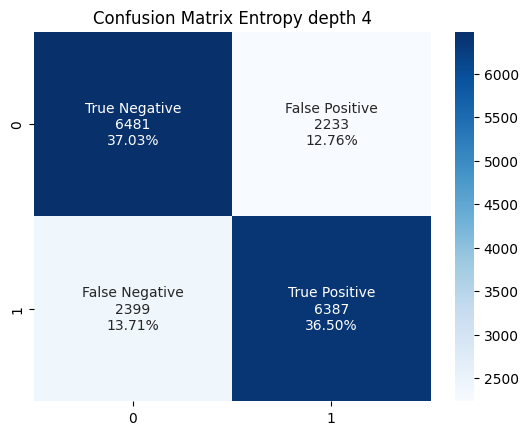

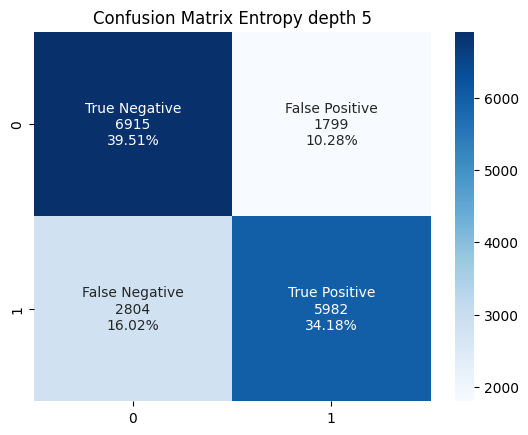

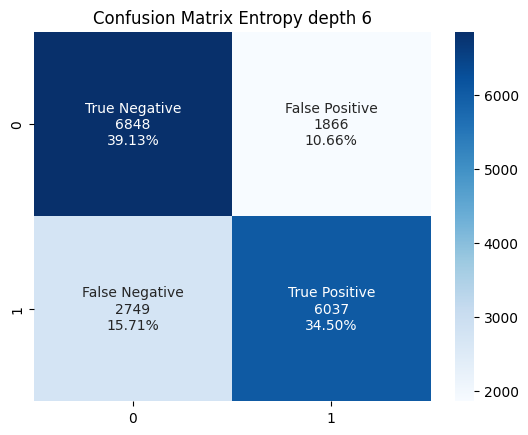

In [14]:
# max_depth_range 4,5,6
max_depth_range = list(range(4, 7))
cf_matrix = []
for depth in max_depth_range:
    entropy = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='entropy')
    entropy.fit(X_train, Y_train)
    Y_predict_entropy = entropy.predict(X_test)
    cf_matrix = confusion_matrix(Y_test,Y_predict_entropy)


    group_labels = ["True Negative","False Positive","False Negative","True Positive"]

    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_labels,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.title("Confusion Matrix Entropy depth "+str(depth))
    sns.heatmap(cf_matrix, annot=labels, fmt='' ,cmap='Blues')
    plt.show()

## Classification Report

In [15]:
# max_depth_range 4,5,6
max_depth_range = list(range(4, 7))

for depth in max_depth_range:
    entropy = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='entropy')
    entropy.fit(X_train, Y_train)
    Y_predict_entropy = entropy.predict(X_test)
    print("Classification Report for depth ",depth)
    print(classification_report(Y_test,Y_predict_entropy))

Classification Report for depth  4
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      8714
           1       0.74      0.73      0.73      8786

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500

Classification Report for depth  5
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      8714
           1       0.77      0.68      0.72      8786

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500

Classification Report for depth  6
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      8714
           1       0.76      0.69      0.72      8786

    accuracy                           0.74     17500
   macro avg       0.74

## 4) Decision tree visualization

## Using Gini

In [16]:
# max_depth_range 4,5,6
max_depth_range = list(range(4, 7))
for depth in max_depth_range:
    gini = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='gini')
    gini.fit(X_train, Y_train)
    #feature_name=['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active']
    fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
    #tree.plot_tree(gini,feature_names= feature_name,class_names=True, filled = True);
    tree.plot_tree(gini,filled = True);
    fig.savefig('gini'+str(depth)+'.png')


Output hidden; open in https://colab.research.google.com to view.

## Using Entropy

In [ ]:
# max_depth_range 4,5,6
max_depth_range = list(range(4, 7))
for depth in max_depth_range:
    entropy = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='entropy')
    entropy.fit(X_train, Y_train)
    #feature_name=['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active']
    fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
    #tree.plot_tree(entropy,feature_names= feature_name,class_names=True, filled = True);
    tree.plot_tree(entropy, filled = True);
    fig.savefig('entropy'+str(depth)+'.png')


# Naive Bayes Classifier




Accuracy score of Naive Bayes: 0.5644571428571429
Axes(0.125,0.11;0.62x0.77)

Classification Report for Naive Bayes 
              precision    recall  f1-score   support

           0       0.54      0.95      0.68      8714
           1       0.78      0.18      0.30      8786

    accuracy                           0.56     17500
   macro avg       0.66      0.57      0.49     17500
weighted avg       0.66      0.56      0.49     17500



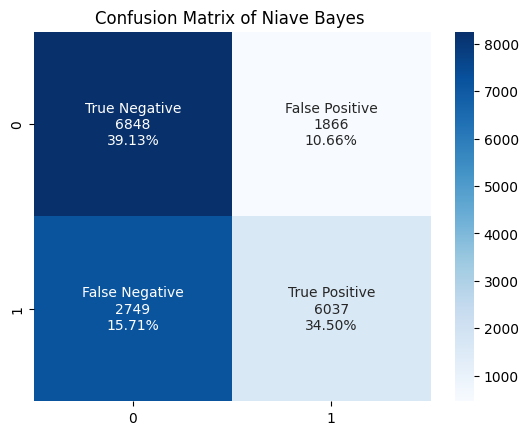

In [17]:


#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)

#Predict Output
y_predict= model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score of Naive Bayes:",metrics.accuracy_score(Y_test, y_predict))

#Confusion matrix
confusionmatrix = metrics.confusion_matrix(Y_test, y_predict)

group_labels = ["True Negative","False Positive","False Negative","True Positive"]

group_counts = ['{0:0.0f}'.format(value) for value in
                    confusionmatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                         confusionmatrix.flatten()/np.sum(cf_matrix)]

plt.title("Confusion Matrix of Niave Bayes ")

#Graphics for confusion matrix
graphics = sns.heatmap(confusionmatrix, annot=labels, fmt='' ,cmap='Blues')

print(graphics)

#Classification report
print("\nClassification Report for Naive Bayes ")
print(classification_report(Y_test,y_predict))

# Visualizing the target variable.

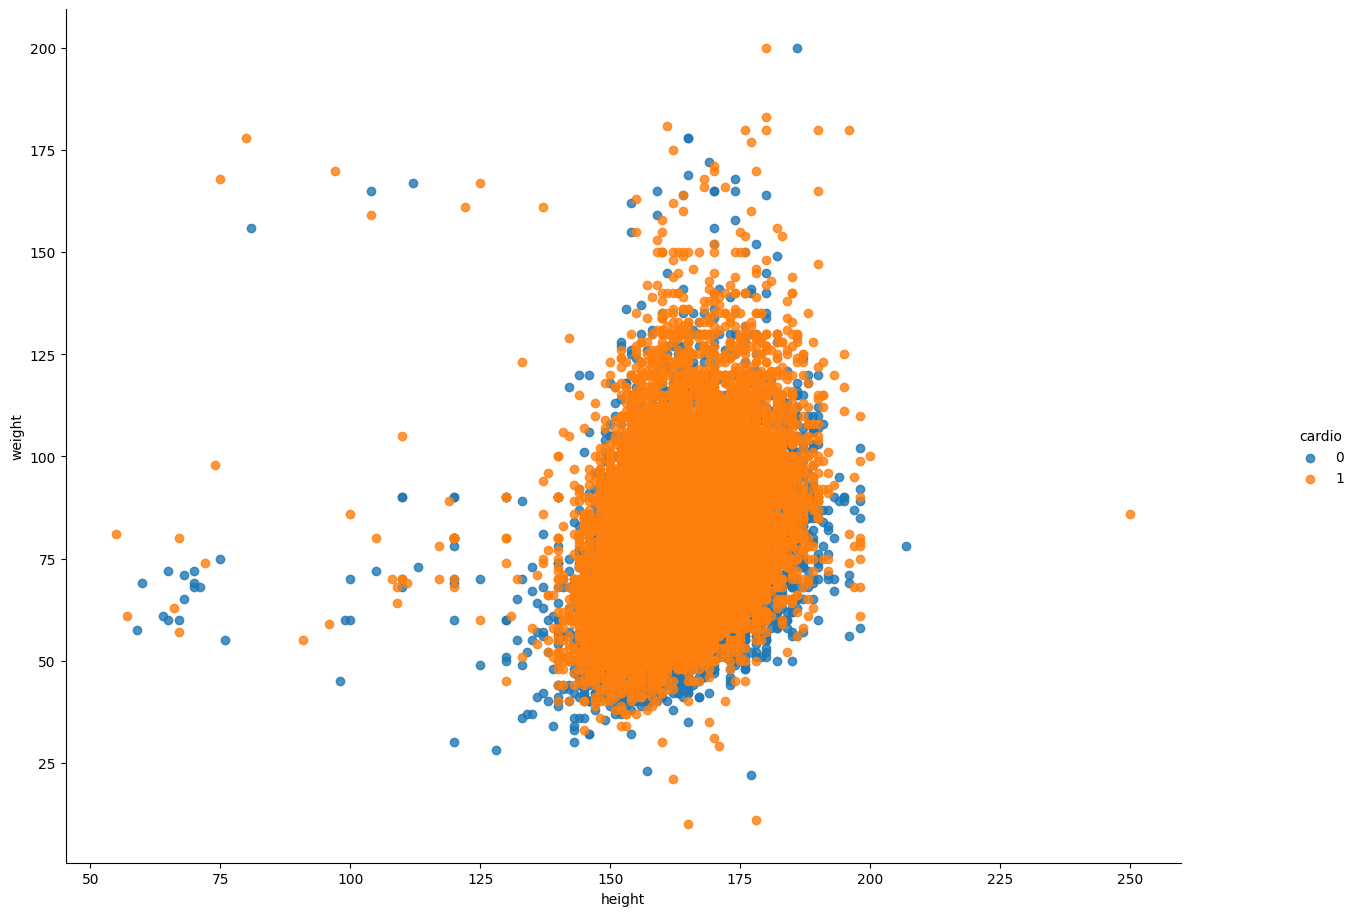

In [18]:
#Visualizing the presence or absence of cardiovascular disease based on height and weight

x = 'height'
y = 'weight'
data = df_data
sns.lmplot(x=x, y=y, data= df_data, hue='cardio', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

## Summary of Visualization of Target variable

<p>Here the graph shows the people having cardiovascular disease base on their height and weight.
</p>
<p>Based on initial observations we can see that its less prominent among people with low height < 100 cm and weight <25 kg .</p>
<p>Conversely considerable number people with heights between 150 and 180 have cardiovascular disease</p>
<p>As, most people lie on the extreme side of their height to weight chart most being overweight.</p>
<p>Also we can't ingnore the fact that there are people who are healthy with ideal height and weight as well as healthy despite being over weight. A lot of factors come to play here like their diet, activity, Hereditary etc </p>

#Visualizing the presence or absence of cardiovascular disease based on age and diastolic blood pressure.

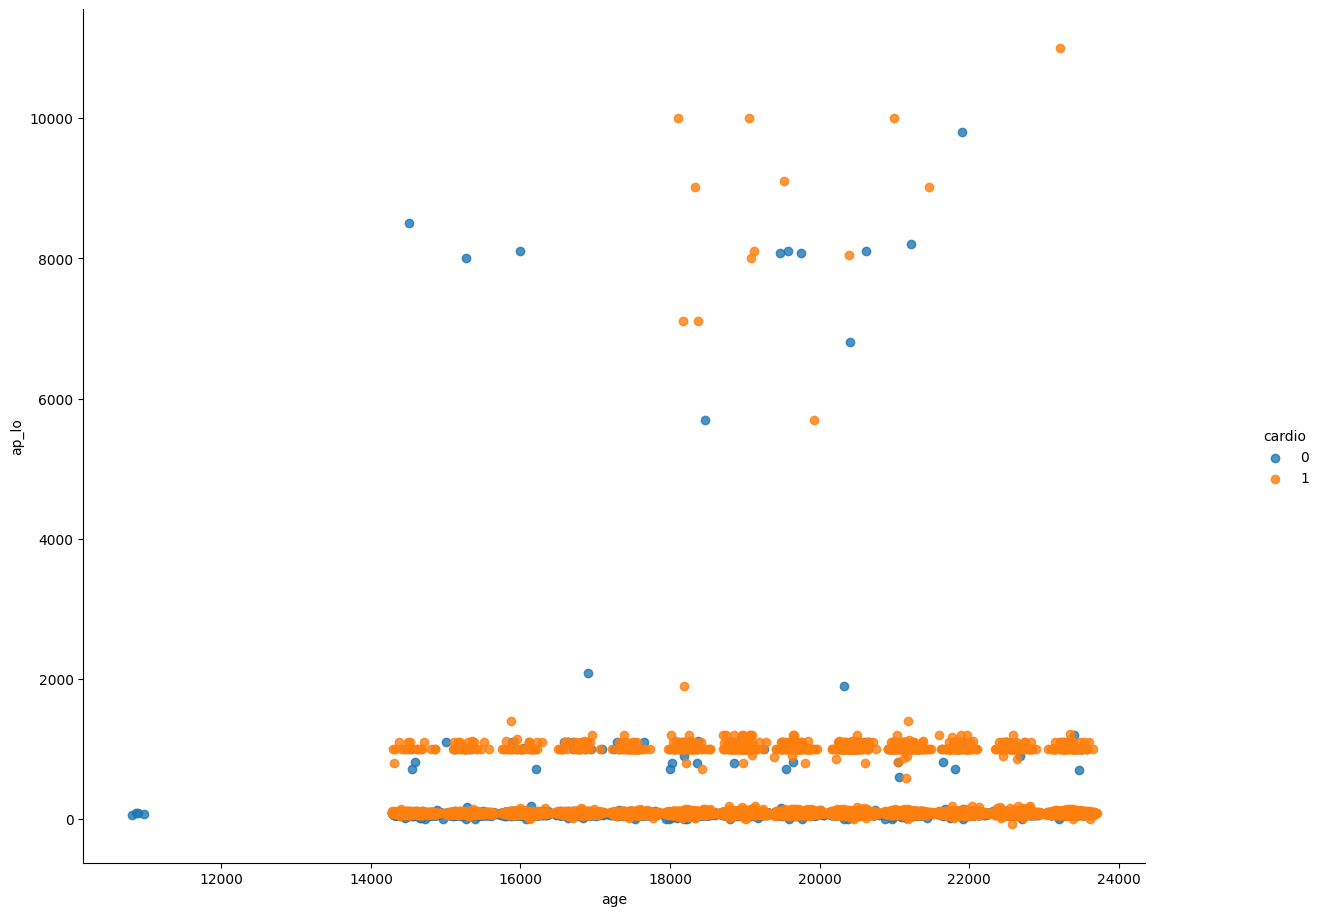

In [19]:
#Visualizing the presence or absence of cardiovascular disease based on age and diastolic blood pressure.

x = 'age'
y ='ap_lo'
data = df_data
sns.lmplot(x=x, y=y, data= df_data, hue='cardio', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

## Insights from above plot

<p>The above graph shows people with cardiovascular disease with low blood pressure with respect to their age</p>
<p>It is clearly seen that people with ages 38 years ie 14000 days and older  develope cardiovascular diseases</p>
<p>Furthermore its also due to people having low blood pressure or them being diastolic.</p>
<p>However we can't ingnore the fact that there are people who are healthy. But lot of factors come to play here like their diet, activity, Hereditary etc</p>

#Distribution of target variable cardio in the dataset.

(array([35021.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

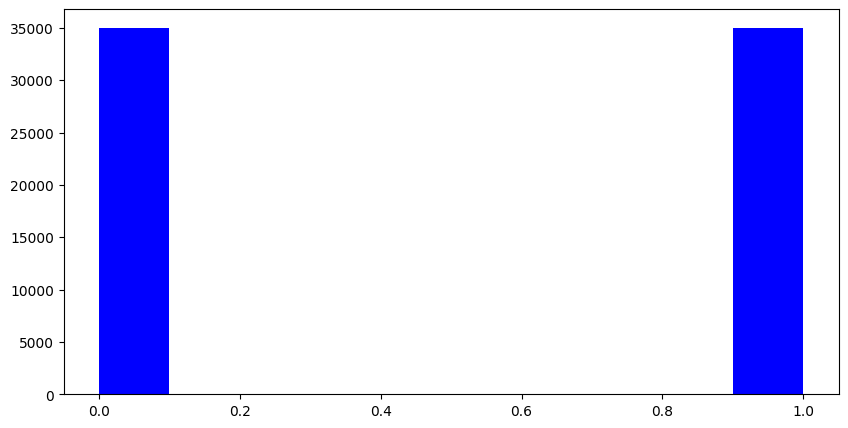

In [20]:
#distribution of target variable cardio in the dataset.

plt.figure(figsize=(10,5))
plt.hist(df_data['cardio'],color='b')


## Insights on above plot

<p>Here the bar on zero represents the absence of cardiovascular disease</p>
<p>Bar on 1 represents the presence of cardiovascular disease and 0 represents the absence of cardiovascular disease</p>
<p> By looking at the plot it is understood that dataset contain fairly equal distribution of both types of patient data.</p>